# CNN_MNIST : Basic CNN

## import

In [122]:
# tensorflow 모듈 import 
import tensorflow as tf
from tensorflow import keras

## Dataset

In [123]:
pwd

'c:\\develop_dir\\deep_and_machine_learning\\Deep_Learning\\220~'

In [124]:
import numpy as np

# 2차원 배열 파일 메모리에 로드
loaded_X_train = np.loadtxt('../100~/data/skyggle_MNIST/X_train.txt', )
loaded_y_train = np.loadtxt('../100~/data/skyggle_MNIST/y_train.txt')
loaded_X_test = np.loadtxt('../100~/data/skyggle_MNIST/X_test.txt')

# 2차원 배열을 3차원으로 

X_train_np = loaded_X_train.reshape(60000, 28, 28)
y_train_np = loaded_y_train.astype(int)
X_test = loaded_X_test.reshape(10000, 28, 28)
# X_train = X_train
# y_train_all = y_train_all.astype(int)
print(X_train_np.shape)
print(y_train_np.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [125]:
# x_train[0] 데이터 확인
# x_train[0] 값 출력
print(X_train_np[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [126]:
y_train_np[0]

5

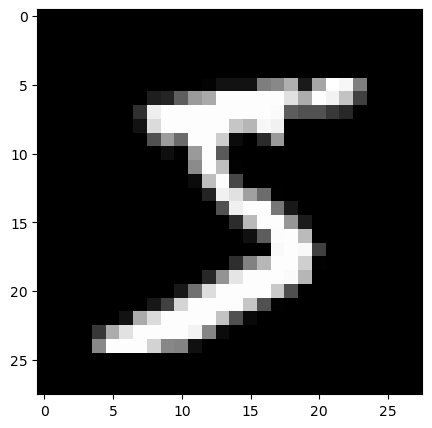

In [127]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(X_train_np[0], cmap='gray')
# plt.axis('off')
plt.show()

In [128]:
# 타겟 분포확인
import pandas as pd
pd.Series(y_train_np).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

#### 데이터 준비: 분할, 정규화, 차원 변경, 원핫인코딩

In [129]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np, test_size=0.2, stratify=y_train_np, random_state=42)

In [130]:
X_train.shape ,X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [131]:
# 데이터 정규화
X_train = X_train / 255
X_val = X_val / 255

In [164]:
# 순차 심층 신경망 입력을 위해 데이터 차원 변경
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_val.shape

((48000, 784), (12000, 784))

In [133]:
stop

NameError: name 'stop' is not defined

In [134]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Dense
from keras import optimizers
from keras.models import Sequential

model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(784, )),
tf.keras.layers.Dense(1000),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(900),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(800),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(700),
tf.keras.layers.Activation("tanh"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(600),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(500),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(400),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(300),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(200),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(100),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dense(10),
tf.keras.layers.Activation("softmax"),
])
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', \
    optimizer='adam')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./tmp_checkpoints.ckpt', \
    save_weights_only=True, save_best_only=True, moniter='val_loss', \
        verbose=1)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.fit(X_train, y_train, \
    validation_data=(X_val, y_val),
    epochs=5,
    callbacks=[checkpoint, earlystopping, lr_scheduler])

learning_rate: 0.01000
Epoch 1/5
  73/1500 [>.............................] - ETA: 1:01 - loss: 2.1077 - accuracy: 0.2265

KeyboardInterrupt: 

In [ ]:
#모델 구조 시각화
dnn_model = model
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 1000)              785000    
                                                                 
 activation_66 (Activation)  (None, 1000)              0         
                                                                 
 dropout_54 (Dropout)        (None, 1000)              0         
                                                                 
 dense_67 (Dense)            (None, 900)               900900    
                                                                 
 activation_67 (Activation)  (None, 900)               0         
                                                                 
 dropout_55 (Dropout)        (None, 900)              

In [ ]:
# dnn_model 학습 
dnn_hist = dnn_model.fit(X_train, y_train, epochs= 5, validation_data=(X_val, y_val), verbose=2 )

Epoch 1/5
1500/1500 - 44s - loss: 0.0912 - accuracy: 0.9763 - val_loss: 0.1049 - val_accuracy: 0.9761 - 44s/epoch - 29ms/step
Epoch 2/5
1500/1500 - 40s - loss: 0.0821 - accuracy: 0.9778 - val_loss: 0.0971 - val_accuracy: 0.9766 - 40s/epoch - 27ms/step
Epoch 3/5
1500/1500 - 42s - loss: 0.0724 - accuracy: 0.9808 - val_loss: 0.0910 - val_accuracy: 0.9774 - 42s/epoch - 28ms/step
Epoch 4/5
1500/1500 - 43s - loss: 0.0621 - accuracy: 0.9842 - val_loss: 0.0907 - val_accuracy: 0.9786 - 43s/epoch - 29ms/step
Epoch 5/5
1500/1500 - 43s - loss: 0.0582 - accuracy: 0.9837 - val_loss: 0.0870 - val_accuracy: 0.9806 - 43s/epoch - 29ms/step


In [ ]:
# 모델을 파일로 저장
dnn_model.save('mnist_20230223.h5')

In [ ]:
# 모델 복원
h5_loaded = tf.keras.models.load_model('mnist_20230223.h5')

In [ ]:
# 모델 성능 테스트 
print(dnn_model.evaluate(X_val, y_val))

375/375 [==============================] - 3s 8ms/step - loss: 0.0870 - accuracy: 0.9806
[0.0869554653763771, 0.9805833101272583]


In [ ]:
# 복원한 모델 성능 테스트
print(h5_loaded.evaluate(X_val, y_val))

375/375 [==============================] - 3s 8ms/step - loss: 0.0870 - accuracy: 0.9806
[0.0869554653763771, 0.9805833101272583]


In [167]:
answer = h5_loaded.predict(X_test)
answer = np.argmax(answer, axis=-1)

313/313 [==============================] - 3s 9ms/step


In [170]:
submission = pd.read_csv('../100~/data/skyggle_MNIST/submission.csv')
submission['label'] = answer
submission.to_csv('DNN_MNIST_submission.csv', index=False)

## Simple CNN

####  데이터셋 준비하기

In [135]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np, \
    stratify=y_train_np, test_size=0.2, random_state=42)

In [190]:
X_train = X_train.reshape(-1, 28, 28)
X_val = X_val.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

In [180]:
# CNN은 (데이터샘플 수, 행의 갯수, 열의 갯수, 채널수)의 형태로 제공되어야 함.
#When using this layer as the first layer in a model, 
#provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), 
#e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last". 
#You can use None when a dimension has variable size.
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# 채널 추가 :minst 데이터셋은 색을 나타내는 채널이 1개인 모노컬러. 색상 채널 추가

X_train_in = X_train[..., tf.newaxis]
X_val_in = X_val[..., tf.newaxis]
X_test_in = X_test[..., tf.newaxis]

print(X_train_in.shape, X_val_in.shape, X_test_in.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 784, 1)


In [174]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
# Sequential API를 사용하여 샘플 모델 생성: 합성곱 레이어1개, 풀링 레이어 1개
cnn_model = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
    input_shape=(28, 28, 1), name="conv_jewoos"),
    MaxPooling2D((2, 2), name='pool_jewoos'),
    Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Activation("relu"),
    Dense(10, activation='softmax')
])

In [194]:
# 모델 컴파일
cnn_model.compile(loss='sparse_categorical_crossentropy', \
    metrics='accuracy', optimizer=optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True))

In [177]:
#모델 구조 파악

# conv 레이어 output( valid padding : 28, 28 -> 26, 26의 특성맵이 32는 커널(필터) 수만큼 생성)
# (28, 28, 1) 이미지에 서로 다른 32개 커널을 적용해서 32종류의 피처(특징)을 추출
# pool 레이어: (2, 2) 풀링을 적용하므로 이미지 크기가 1/2로 줄어듬(13, 13)

# conv param: 320  (학습 가능한 파라미터 수)
#  ( 3* 3(커널의 크기) * 1( 채널 수) * 필터수(32) = 288 ) + (32(필터별 상수항, 바이어스) = 320
cnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_jewoos (Conv2D)        (None, 26, 26, 32)        320       
                                                                 
 pool_jewoos (MaxPooling2D)  (None, 13, 13, 32)        0         
                                                                 
 flatten_11 (Flatten)        (None, 5408)              0         
                                                                 
 dense_92 (Dense)            (None, 100)               540900    
                                                                 
 activation_89 (Activation)  (None, 100)               0         
                                                                 
 dropout_73 (Dropout)        (None, 100)               0         
                                                                 
 dense_93 (Dense)            (None, 50)              

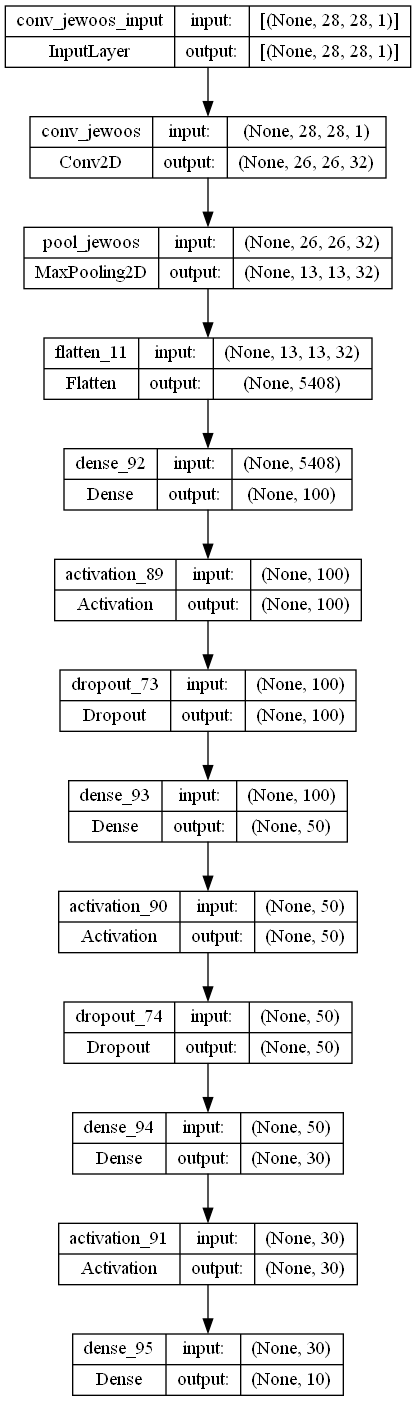

In [178]:
#모델 구조 시각화
from keras.utils import plot_model
plot_model(cnn_model, show_shapes=True, to_file='mnist_cnn_20230223.png')

* 모델 구조 세부 확인

In [142]:
# 모델의 입력 텐서 확인
cnn_model.input
# (None, 28, 28, 1) : 가장 앞에 있는 축이 None인 것은 batch크가기 들어오는 자리로 배치 크리로 어떤 값이든 가능하다는 뜻

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_jewoos_input')>

In [143]:
# 모델의 출력 텐서 
cnn_model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_89')>

In [144]:
# 모델을 구성하는 레이어 확인
cnn_model.layers

In [145]:
# 레이어 선택: 리스트 인덱싱
cnn_model.layers[0]

In [146]:
# 첫 번째 레이어 입력 정보
cnn_model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_jewoos_input')>

In [147]:
#첫 번째 레이어 출력
cnn_model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv_jewoos')>

In [148]:
# 첫 번째 레이어의 가중치
cnn_model.layers[0].weights[0][0][0]

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[-0.11949124, -0.12377535,  0.01283805,  0.08364786, -0.0808434 ,
        -0.1242861 , -0.13086136, -0.1291631 , -0.02235416, -0.02127315,
        -0.04708541, -0.11022465, -0.06026525, -0.00878824, -0.0195472 ,
        -0.02965038, -0.10021541,  0.12711431, -0.03508499,  0.12176369,
         0.1058659 ,  0.13912235,  0.12026893, -0.10675557,  0.05770144,
        -0.0581108 ,  0.10503009,  0.0326937 , -0.1345781 ,  0.08470249,
        -0.12383116,  0.01774718]], dtype=float32)>

In [149]:
# 첫번째 레이어의 커널, 필터의 가중치
cnn_model.layers[0].kernel

<tf.Variable 'conv_jewoos/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.11949124, -0.12377535,  0.01283805,  0.08364786,
          -0.0808434 , -0.1242861 , -0.13086136, -0.1291631 ,
          -0.02235416, -0.02127315, -0.04708541, -0.11022465,
          -0.06026525, -0.00878824, -0.0195472 , -0.02965038,
          -0.10021541,  0.12711431, -0.03508499,  0.12176369,
           0.1058659 ,  0.13912235,  0.12026893, -0.10675557,
           0.05770144, -0.0581108 ,  0.10503009,  0.0326937 ,
          -0.1345781 ,  0.08470249, -0.12383116,  0.01774718]],

        [[-0.06585141, -0.11978546,  0.07454206, -0.13934523,
          -0.03435566, -0.043029  , -0.13826899, -0.04297281,
          -0.06897928, -0.02735024,  0.12054877,  0.01530257,
           0.0460228 , -0.04702546,  0.1049796 , -0.1222795 ,
          -0.0256435 , -0.12286592,  0.08695184, -0.03583986,
           0.04662773, -0.06319718,  0.11639254,  0.09166411,
          -0.13188028, -0.05472765, -0.03165945, -0

In [221]:
X_train_in.shape

(48000, 28, 28, 1)

In [219]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_in = scaler.fit_transform(X_train_in)
X_test_in = scaler.fit_transform(X_test_in)
X_val_in = scaler.fit_transform(X_val_in)

ValueError: Found array with dim 4. MinMaxScaler expected <= 2.

In [235]:
# 모델 훈련
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler

from keras.layers import Conv2D, MaxPooling2D, Flatten
# Sequential API를 사용하여 샘플 모델 생성: 합성곱 레이어1개, 풀링 레이어 1개
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), \
                        activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1000, activation='relu'))
# Dropout 레이어 추가
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(units=700, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(units=500, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(units=300, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(units=100, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(10, activation='softmax'))


cnn_model.compile(loss='sparse_categorical_crossentropy', \
    metrics=['acc'], optimizer='adam')

saved_best_model = ModelCheckpoint(filepath='./best_mnist_cnn_model.h5', \
    save_weights_only=False, save_best_only=True, moniter='val_loss')

earlystopping = EarlyStopping(monitor='val_loss', patience=5)

def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = LearningRateScheduler(scheduler)
hist = cnn_model.fit(X_train_in, y_train, validation_data=(X_val_in, y_val), epochs=20, \
    callbacks=[checkpoint, earlystopping, lr_scheduler])

learning_rate: 0.00100
Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 2.9416 - acc: 0.3631
Epoch 1: val_loss did not improve from 0.07990
1500/1500 [==============================] - 81s 53ms/step - loss: 2.9401 - acc: 0.3634 - val_loss: 0.4868 - val_acc: 0.8509 - lr: 0.0010
learning_rate: 0.00100
Epoch 2/20
1500/1500 [==============================] - ETA: 0s - loss: 0.4901 - acc: 0.8598
Epoch 2: val_loss did not improve from 0.07990
1500/1500 [==============================] - 79s 53ms/step - loss: 0.4901 - acc: 0.8598 - val_loss: 0.1616 - val_acc: 0.9648 - lr: 0.0010
learning_rate: 0.00100
Epoch 3/20
1500/1500 [==============================] - ETA: 0s - loss: 0.2776 - acc: 0.9366
Epoch 3: val_loss did not improve from 0.07990
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2776 - acc: 0.9366 - val_loss: 0.1264 - val_acc: 0.9707 - lr: 0.0010
learning_rate: 0.00100
Epoch 4/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.

KeyboardInterrupt: 

In [223]:
df = pd.DataFrame(hist.history)
df

,loss,accuracy,val_loss,val_accuracy,lr
0,1.574264,0.690583,0.133042,0.964083,0.001000
1,0.235667,0.940854,0.134686,0.968000,0.001000
2,0.178387,0.957396,0.106108,0.974250,0.001000
3,0.151804,0.964021,0.117188,0.973750,0.001000
4,0.136816,0.969333,0.091691,0.979917,0.001000
5,0.110435,0.975271,0.096133,0.981583,0.000905
6,0.081494,0.981833,0.098334,0.983500,0.000819
7,0.075301,0.984250,0.109138,0.981667,0.000741
8,0.062805,0.986521,0.094365,0.984833,0.000670
9,0.057057,0.988271,0.079901,0.986250,0.000607


#### 손실과 정확도 그래프: 모델 성능 평가

* 모델 학습 결과 시각화

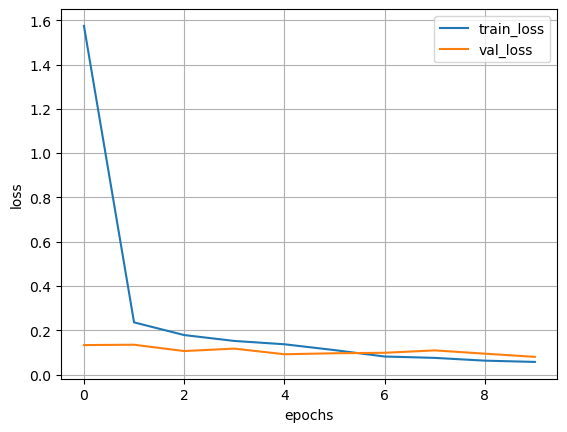

In [224]:
# 시각화
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

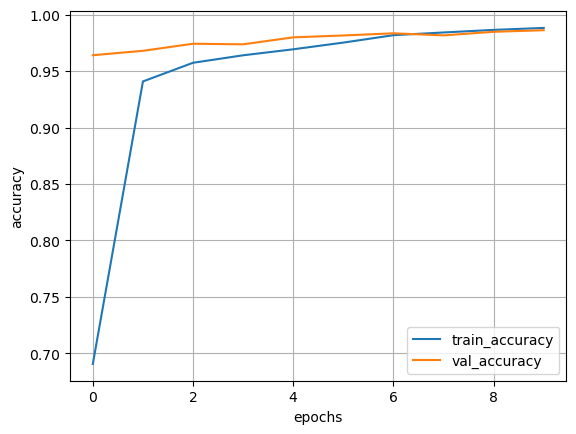

In [225]:
# 시각화
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

* 예측값 생성 및 제출

In [226]:
y_pred_proba = cnn_model.predict(X_test_in)

ValueError: in user code:

    File "c:\Users\PlayData\anaconda3\envs\tf2\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\PlayData\anaconda3\envs\tf2\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\PlayData\anaconda3\envs\tf2\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\PlayData\anaconda3\envs\tf2\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Users\PlayData\anaconda3\envs\tf2\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\PlayData\anaconda3\envs\tf2\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 784, 1)


In [156]:
len(y_pred_proba)

10000

In [158]:
np.set_printoptions(suppress=True)
y_pred_proba[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [160]:
y_pred_label = np.argmax(y_pred_proba, axis=-1)
y_pred_label[0]

7

In [236]:
h5_loaded = tf.keras.models.load_model('best_mnist_cnn_model.h5')

In [237]:
answer = h5_loaded.predict(X_test)
answer = np.argmax(answer, axis=-1)

313/313 [==============================] - 3s 9ms/step


In [238]:
answer

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [239]:
submission

,no,label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
...,...,...
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5


In [240]:
submission = pd.read_csv('../100~/data/skyggle_MNIST/submission.csv')
submission['label'] = answer
submission.to_csv('CNN_MNIST_submission.csv', index=False)